In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h = 0.1
tau = 0.01
x = np.arange(0, 100+h, h)
t = np.arange(0, 1, tau)
c = 50

def mu2(x):
    return [1/(1 + ((t-20)/10)**10) for t in x]
def mu1(t,c):
    return mu2(-1*c*t)[0]
def f(t, x):
    return 0

In [3]:
u = np.zeros((len(t), len(x)))
for i in range(len(t)):
    u[i][0] = mu1(t,c)
u[0] = mu2(x)
u

array([[9.75609756e-04, 1.02570754e-03, 1.07864713e-03, ...,
        9.54929008e-10, 9.43044543e-10, 9.31322574e-10],
       [9.75609756e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.75609756e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.75609756e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.75609756e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.75609756e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Составная схема

In [4]:
u = np.zeros((len(t), len(x)))
for i in range(len(t)):
    u[i][0] = mu1(t,c)
u[0] = mu2(x)
for i in range(1, len(t)):
    for j in range(1, len(x)):
        tau = t[i] - t[i-1]
        h = x[j] - x[j-1]
        k = c * tau / h 
        if k<=1:
            u[i][j] = f(t[i] + tau/2, x[j] - h/2)*tau - c * (u[i-1][j] - u[i-1][j-1])*tau/h + u[i-1][j]
        else:
            u[i][j] = (f(t[i] + tau/2, x[j] - h/2)*h - (u[i][j-1] - u[i-1][j-1])*h/tau + c * u[i][j-1])/c
u1 = u

<IPython.core.display.Javascript object>


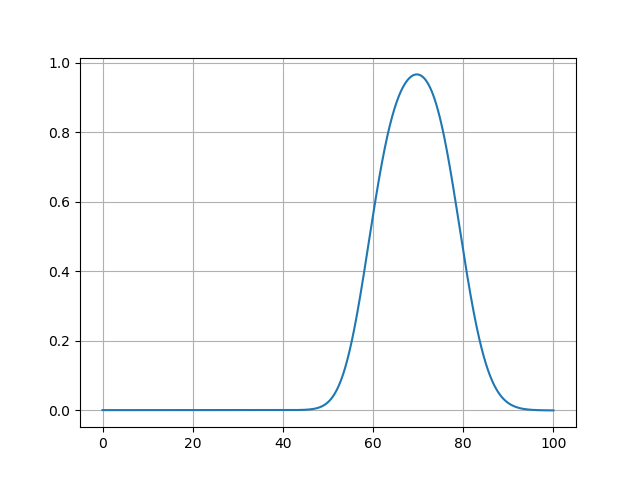

In [5]:
%matplotlib notebook
plt.figure()
plt.grid()
plt.plot(x, u1[99])

## Неявная схема

In [6]:
u = np.zeros((len(t), len(x)))
for i in range(len(t)):
    u[i][0] = mu1(t,c)
u[0] = mu2(x)
for i in range(1, len(t)):
    for j in range(1, len(x)):
        tau = t[i] - t[i-1]
        h = x[j] - x[j-1]
        u[i][j] = (f(t[i]+tau/2, x[j]-h/2)*tau*h + h*u[i-1][j] + c*tau*u[i][j-1]) / (h+c*tau)
u2 = u

<IPython.core.display.Javascript object>


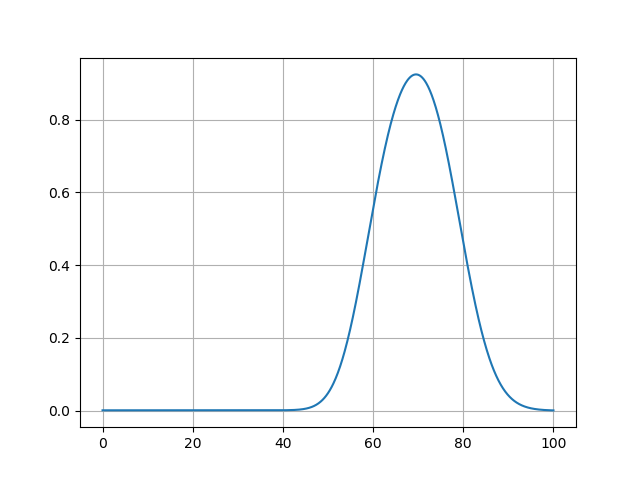

In [7]:
plt.figure()
plt.grid()
plt.plot(x, u2[99])

## Схема с полусуммой

<IPython.core.display.Javascript object>


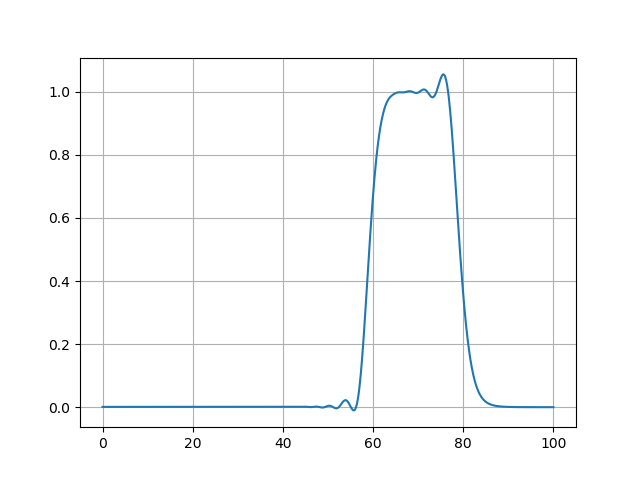

In [8]:
u = np.zeros((len(t), len(x)))
for i in range(len(t)):
    u[i][0] = mu1(t,c)
u[0] = mu2(x)
for i in range(1, len(t)):
    for j in range(1, len(x)):
        tau = t[i] - t[i-1]
        h = x[j] - x[j-1]
        u[i][j] = (2*f(t[i]+tau/2, x[j]-h/2)*tau*h - h*(u[i][j-1] - u[i-1][j] - u[i-1][j-1] ) -tau*c*(u[i-1][j] - u[i][j-1] - u[i-1][j-1])) / (h+c*tau)
u3 = u
plt.figure()
plt.grid()
plt.plot(x, u3[99])

<IPython.core.display.Javascript object>


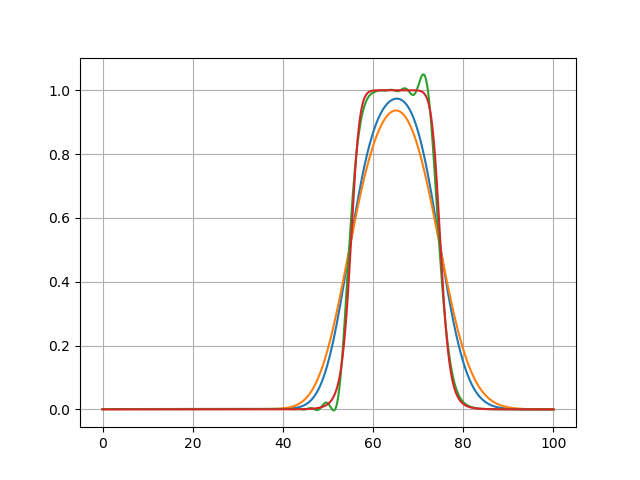

In [9]:
i = 90
plt.figure()
plt.grid()
plt.plot(x, u1[i])
plt.plot(x, u2[i])
plt.plot(x, u3[i])
plt.plot(x, mu2(x - t[i]*c))